# **Load Libraries**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import log_loss
from sklearn.feature_selection import RFE
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import PolynomialFeatures
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedKFold
from sklearn.utils import resample
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN

#!pip install yellowbrick
#from yellowbrick.model_selection import RFECV

#!pip install Pydotplus
#!pip install Graphviz
import pydotplus
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import warnings

from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC
from sklearn.ensemble import RandomForestClassifier

from matplotlib.legend_handler import HandlerLine2D

#!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

print("done")

done


C:\Users\HANDEKONSUKUNLU\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Import Dataset**
---

In [2]:
med_app_downsample_ML = pd.read_csv("medical_appointment_downsample_features_21.10.2010.csv")
np.random.seed(42)

In [3]:
med_app_downsample_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101803 entries, 0 to 101802
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   days_diff                            101803 non-null  int64
 1   Scholarship_True                     101803 non-null  int64
 2   is_First_visit_Re-Visit to Hospital  101803 non-null  int64
 3   number_of_appointments               101803 non-null  int64
 4   Hip_Dia                              101803 non-null  int64
 5   Gender_M                             101803 non-null  int64
 6   SMS_received_True                    101803 non-null  int64
 7   day_of_week                          101803 non-null  int64
 8   Alcoholism_True                      101803 non-null  int64
 9   Age                                  101803 non-null  int64
 10  No-show                              101803 non-null  int64
dtypes: int64(11)
memory usage: 8.5 MB


In [4]:
result_mat= pd.DataFrame(columns=["Method","Train Score","Test Accuracy","Test Recall","Test Precision","Test AUC",
                              "Validation Accuracy","Validation Recall","Validation Precision","Validation AUC"])


# **Data Preparation**
---

## **Validation Data**

In [5]:
X=med_app_downsample_ML.drop('No-show',axis=1)
y=med_app_downsample_ML['No-show']

In [6]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_poly=pd.DataFrame(poly.fit_transform(X), columns=poly.get_feature_names(X.columns))

In [7]:
X_main, X_validation, y_main, y_validation =  train_test_split(X_poly, y, test_size=0.10, random_state=42, stratify=y)

## **Down-Sample**


In [8]:
med_app_main=pd.concat([X_main,y_main],axis=1)

In [9]:
no_show = med_app_main[med_app_main['No-show']==1]
show = med_app_main[med_app_main['No-show']==0]

In [10]:
med_app_downsampled = resample(show,
                               replace = True,
                               n_samples = len(no_show),
                               random_state = 42)
downsampled_df = pd.concat([med_app_downsampled,no_show])
downsampled_df['No-show'].value_counts()

1    18378
0    18378
Name: No-show, dtype: int64

## **Train-Test Split**

In [11]:
X_down=downsampled_df.drop('No-show',axis=1)
y_down=downsampled_df['No-show']

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X_down, y_down, test_size=0.30, random_state=42)

# **Classification Algorithms**
---

## **Logistic Regression**

In [13]:
logistic_regression = LogisticRegression(penalty='none',
    random_state=42
)

logistic_regression.fit(X_train, y_train)

pred_train = logistic_regression.predict(X_train)
pred_test = logistic_regression.predict(X_test)
pred_validation = logistic_regression.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = logistic_regression.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = logistic_regression.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = logistic_regression.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = logistic_regression.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = logistic_regression.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.65      0.62      0.64     12883
           1       0.64      0.67      0.65     12846

    accuracy                           0.64     25729
   macro avg       0.64      0.64      0.64     25729
weighted avg       0.64      0.64      0.64     25729

f1_score() value        : 0.65
recall_score() value    : 0.67
precision_score() value : 0.64


Precision  : [0.65097561 0.63690521]
Recall     : [0.62151673 0.66581037]
F1 Score   : [0.63590517 0.65103711]


Test Dataset


              precision    recall  f1-score   support

           0       0.65      0.61      0.63      5495
           1       0.64      0.67      0.65      5532

    accuracy                           0.64     11027
   macro avg       0.64      0.64      0.64     11027
weighted avg       0.64      0.64      0.64     11027

f1_score() value        : 0.65
recall_score() value    : 0.67
precision_score() value : 0.64


Precision  :

In [14]:
lr_result={'Method':'Logistic Regression',  'Train Score': logistic_regression.score(X_train,y_train),
           'Test Accuracy': logistic_regression.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': logistic_regression.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [15]:
result_mat=result_mat.append(lr_result,ignore_index=True)

In [16]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.64206,0.66974,0.636052,0.669723,0.621943,0.660137,0.299356,0.66609


### **Logistic Regression -- L1 Regularization**

In [17]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1'],
               "solver" : ["liblinear"]
             }
tuning= pd.DataFrame(columns=["C","Penalty","Score"])

lr_l1_grid_cv= GridSearchCV(estimator=LogisticRegression(random_state=42),
    param_grid=parameters,
    cv=5
    )

lr_l1_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1'], 'solver': ['liblinear']})

In [18]:
logistic_regression_l1 = LogisticRegression(**lr_l1_grid_cv.best_params_,
    random_state=42
)

logistic_regression_l1.fit(X_train, y_train)

pred_train = logistic_regression_l1.predict(X_train)
pred_test = logistic_regression_l1.predict(X_test)
pred_validation = logistic_regression_l1.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = logistic_regression_l1.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = logistic_regression_l1.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = logistic_regression_l1.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = logistic_regression_l1.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = logistic_regression_l1.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.77      0.48      0.59     12883
           1       0.62      0.85      0.72     12846

    accuracy                           0.67     25729
   macro avg       0.69      0.67      0.65     25729
weighted avg       0.69      0.67      0.65     25729

f1_score() value        : 0.72
recall_score() value    : 0.85
precision_score() value : 0.62


Precision  : [0.7657221  0.61986088]
Recall     : [0.47822712 0.85326172]
F1 Score   : [0.58875245 0.71807134]


Test Dataset


              precision    recall  f1-score   support

           0       0.76      0.47      0.58      5495
           1       0.62      0.85      0.72      5532

    accuracy                           0.66     11027
   macro avg       0.69      0.66      0.65     11027
weighted avg       0.69      0.66      0.65     11027

f1_score() value        : 0.72
recall_score() value    : 0.85
precision_score() value : 0.62


Precision  :

In [19]:
lr_l1_result={'Method':'Logistic Regression-L1', 'Train Score': logistic_regression_l1.score(X_train,y_train),
           'Test Accuracy': logistic_regression_l1.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': logistic_regression_l1.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [20]:
result_mat=result_mat.append(lr_l1_result,ignore_index=True)

In [21]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.66974,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.85141,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075


### **Logistic Regression -- L2 Regularization**

In [22]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l2']
             }
tuning= pd.DataFrame(columns=["C","Penalty","Score"])

lr_l2_grid_cv= GridSearchCV(estimator=LogisticRegression(random_state=42),
    param_grid=parameters,
    cv=5
    )

lr_l2_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l2']})

In [23]:
logistic_regression_l2 = LogisticRegression(**lr_l2_grid_cv.best_params_,
    random_state=42
)

logistic_regression_l2.fit(X_train, y_train)

pred_train = logistic_regression_l2.predict(X_train)
pred_test = logistic_regression_l2.predict(X_test)
pred_validation = logistic_regression_l2.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = logistic_regression_l2.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = logistic_regression_l2.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = logistic_regression_l2.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = logistic_regression_l2.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = logistic_regression_l2.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.65      0.61      0.63     12883
           1       0.64      0.67      0.65     12846

    accuracy                           0.64     25729
   macro avg       0.64      0.64      0.64     25729
weighted avg       0.65      0.64      0.64     25729

f1_score() value        : 0.65
recall_score() value    : 0.67
precision_score() value : 0.64


Precision  : [0.65450182 0.63547087]
Recall     : [0.6139098  0.67499611]
F1 Score   : [0.63355629 0.65463742]


Test Dataset


              precision    recall  f1-score   support

           0       0.65      0.61      0.63      5495
           1       0.63      0.68      0.66      5532

    accuracy                           0.64     11027
   macro avg       0.64      0.64      0.64     11027
weighted avg       0.64      0.64      0.64     11027

f1_score() value        : 0.66
recall_score() value    : 0.68
precision_score() value : 0.63


Precision  :

In [24]:
lr_l2_result={'Method':'Logistic Regression-L2', 'Train Score': logistic_regression_l2.score(X_train,y_train),
           'Test Accuracy': logistic_regression_l2.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': logistic_regression_l2.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [25]:
result_mat=result_mat.append(lr_l2_result,ignore_index=True)

In [26]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926


### **Logistic Regression -- Elastic Net**

In [27]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "l1_ratio": np.arange(0.0, 1.0, 0.1),
              "penalty": [ 'elasticnet'],
               "solver" : ["saga"]
             }
tuning= pd.DataFrame(columns=["cv_value", "C","Penalty","Score"])

lr_enet_grid_cv= GridSearchCV(estimator=LogisticRegression(),
    param_grid=parameters,
    cv=5                
    )

lr_enet_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'penalty': ['elasticnet'], 'solver': ['saga']})

In [28]:
logistic_regression_enet = LogisticRegression(**lr_enet_grid_cv.best_params_,
    random_state=42
)

logistic_regression_enet.fit(X_train, y_train)

pred_train = logistic_regression_enet.predict(X_train)
pred_test = logistic_regression_enet.predict(X_test)
pred_validation = logistic_regression_enet.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = logistic_regression_enet.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = logistic_regression_enet.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = logistic_regression_enet.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = logistic_regression_enet.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = logistic_regression_enet.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.70      0.56      0.62     12883
           1       0.63      0.76      0.69     12846

    accuracy                           0.66     25729
   macro avg       0.66      0.66      0.65     25729
weighted avg       0.66      0.66      0.65     25729

f1_score() value        : 0.69
recall_score() value    : 0.76
precision_score() value : 0.63


Precision  : [0.69566062 0.62943998]
Recall     : [0.5562369  0.75595516]
F1 Score   : [0.61818496 0.68692085]


Test Dataset


              precision    recall  f1-score   support

           0       0.69      0.55      0.61      5495
           1       0.63      0.75      0.68      5532

    accuracy                           0.65     11027
   macro avg       0.66      0.65      0.65     11027
weighted avg       0.66      0.65      0.65     11027

f1_score() value        : 0.68
recall_score() value    : 0.75
precision_score() value : 0.63


Precision  :

In [29]:
lr_enet_result={'Method':'Logistic Regression-ElasticNet', 'Train Score': logistic_regression_enet.score(X_train,y_train),
           'Test Accuracy': logistic_regression_enet.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': logistic_regression_enet.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [30]:
result_mat=result_mat.append(lr_enet_result,ignore_index=True)

In [31]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976


## **Decision Tree**

In [32]:
dt = DecisionTreeClassifier(
    random_state = 42
)

parameters = dict(max_depth=list(range(3, 11,1)),
                  max_features = list(range(3,X_train.shape[1])),
                  min_samples_split =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
                  min_samples_leaf =[1,2,3,4,5,6,7,8,9,10,15],
                  criterion=['gini','entropy']          
                 )


dt_randomsearch_train = RandomizedSearchCV(estimator=dt,
                           param_distributions= parameters,
                           cv = 5,
                           scoring = 'accuracy',
                           random_state=42              
                      )

dt_randomsearch_train.fit(X_train, y_train)
dt_randomsearch_train.best_params_


{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 48,
 'max_depth': 4,
 'criterion': 'gini'}

In [33]:
decision_tree_rs = DecisionTreeClassifier(**dt_randomsearch_train.best_params_,
    random_state=42
)

decision_tree_rs.fit(X_train, y_train)

pred_train = decision_tree_rs.predict(X_train)
pred_test = decision_tree_rs.predict(X_test)
pred_validation = decision_tree_rs.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = decision_tree_rs.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = decision_tree_rs.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = decision_tree_rs.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = decision_tree_rs.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = decision_tree_rs.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.70      0.61      0.65     12883
           1       0.65      0.74      0.69     12846

    accuracy                           0.67     25729
   macro avg       0.68      0.67      0.67     25729
weighted avg       0.68      0.67      0.67     25729

f1_score() value        : 0.69
recall_score() value    : 0.74
precision_score() value : 0.65


Precision  : [0.7004366  0.65379843]
Recall     : [0.61018396 0.73828429]
F1 Score   : [0.65220277 0.69347763]


Test Dataset


              precision    recall  f1-score   support

           0       0.69      0.60      0.64      5495
           1       0.65      0.73      0.69      5532

    accuracy                           0.67     11027
   macro avg       0.67      0.67      0.66     11027
weighted avg       0.67      0.67      0.66     11027

f1_score() value        : 0.69
recall_score() value    : 0.73
precision_score() value : 0.65


Precision  :

In [34]:
dt_result={'Method':'Decision Tree',  'Train Score': decision_tree_rs.score(X_train,y_train),
           'Test Accuracy': decision_tree_rs.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': decision_tree_rs.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [35]:
result_mat=result_mat.append(dt_result,ignore_index=True)

In [36]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814


## **Random Forest**

In [37]:
rf = RandomForestClassifier(
    random_state = 42, n_jobs = -1
)

parameters = dict(n_estimators= [100,150,200,250,500,1000], 
                  max_depth=list(range(3, 11,1)),
                  max_features = list(range(3,X_train.shape[1])),
                  min_samples_split =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
                  min_samples_leaf =[1,2,3,4,5,6,7,8,9,10,15],
                  criterion=['gini','entropy']          
                 )


rf_randomsearch_train = RandomizedSearchCV(estimator=rf,
                           param_distributions= parameters,
                           cv = 5,
                           scoring = 'accuracy',
                           random_state=42              
                      )

rf_randomsearch_train.fit(X_train, y_train)
rf_randomsearch_train.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 7,
 'max_features': 14,
 'max_depth': 9,
 'criterion': 'entropy'}

In [38]:
random_forest_rs = RandomForestClassifier(**rf_randomsearch_train.best_params_,
    random_state=42
)

random_forest_rs.fit(X_train, y_train)

pred_train = random_forest_rs.predict(X_train)
pred_test = random_forest_rs.predict(X_test)
pred_validation = random_forest_rs.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = random_forest_rs.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = random_forest_rs.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = random_forest_rs.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = random_forest_rs.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = random_forest_rs.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.77      0.59      0.67     12883
           1       0.67      0.82      0.74     12846

    accuracy                           0.71     25729
   macro avg       0.72      0.71      0.70     25729
weighted avg       0.72      0.71      0.70     25729

f1_score() value        : 0.74
recall_score() value    : 0.82
precision_score() value : 0.67


Precision  : [0.76932453 0.66576429]
Recall     : [0.58790654 0.82321345]
F1 Score   : [0.66649067 0.73616429]


Test Dataset


              precision    recall  f1-score   support

           0       0.72      0.56      0.63      5495
           1       0.64      0.79      0.71      5532

    accuracy                           0.67     11027
   macro avg       0.68      0.67      0.67     11027
weighted avg       0.68      0.67      0.67     11027

f1_score() value        : 0.71
recall_score() value    : 0.79
precision_score() value : 0.64


Precision  :

In [39]:
rf_result={'Method':'Random Forest',  'Train Score': random_forest_rs.score(X_train,y_train),
           'Test Accuracy': random_forest_rs.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': random_forest_rs.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [40]:
result_mat=result_mat.append(rf_result,ignore_index=True)

In [41]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814
5,Random Forest,0.705391,0.673529,0.790311,0.641809,0.725291,0.595128,0.809500,0.306907,0.723993


## **Naive-Bayes**

In [42]:
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

pred_train = naive_bayes.predict(X_train)
pred_test = naive_bayes.predict(X_test)
pred_validation = naive_bayes.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = naive_bayes.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = naive_bayes.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = naive_bayes.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = naive_bayes.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = naive_bayes.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.56      0.77      0.65     12883
           1       0.63      0.38      0.48     12846

    accuracy                           0.58     25729
   macro avg       0.59      0.58      0.56     25729
weighted avg       0.59      0.58      0.56     25729

f1_score() value        : 0.48
recall_score() value    : 0.38
precision_score() value : 0.63


Precision  : [0.5570222  0.62751592]
Recall     : [0.77303423 0.38346567]
F1 Score   : [0.64748716 0.47603402]


Test Dataset


              precision    recall  f1-score   support

           0       0.56      0.77      0.64      5495
           1       0.63      0.39      0.48      5532

    accuracy                           0.58     11027
   macro avg       0.59      0.58      0.56     11027
weighted avg       0.59      0.58      0.56     11027

f1_score() value        : 0.48
recall_score() value    : 0.39
precision_score() value : 0.63


Precision  :

In [43]:
nb_result={'Method':'Naive Bayes',  'Train Score': naive_bayes.score(X_train,y_train),
           'Test Accuracy': naive_bayes.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': naive_bayes.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [44]:
result_mat=result_mat.append(nb_result,ignore_index=True)

In [45]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814
5,Random Forest,0.705391,0.673529,0.790311,0.641809,0.725291,0.595128,0.809500,0.306907,0.723993
6,Naive Bayes,0.578530,0.577854,0.389190,0.627880,0.639046,0.697279,0.393242,0.303477,0.645405


## **K-NN**

In [46]:
knn= KNeighborsClassifier(
     n_jobs = -1
)

parameters = dict(n_neighbors=list(range(3, 20,2)),
                  weights = ['uniform', 'distance'],
                  leaf_size=list(range(1,40,1)),
                  algorithm=['auto', 'ball_tree','kd_tree','brute'],
                  metric=['minkowski', 'chebyshev'],
                  p=[1,2]
                 )


knn_randomsearch_train = RandomizedSearchCV(estimator=knn,
                           param_distributions= parameters,
                           cv = 5,
                           scoring = 'accuracy',
                           random_state=42              
                      )

knn_randomsearch_train.fit(X_train, y_train)
knn_randomsearch_train.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 13,
 'metric': 'minkowski',
 'leaf_size': 38,
 'algorithm': 'brute'}

In [47]:
knn_rs = KNeighborsClassifier(**knn_randomsearch_train.best_params_
)

knn_rs.fit(X_train, y_train)

pred_train = knn_rs.predict(X_train)
pred_test = knn_rs.predict(X_test)
pred_validation = knn_rs.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = knn_rs.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = knn_rs.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = knn_rs.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = knn_rs.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = knn_rs.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12883
           1       0.98      0.89      0.93     12846

    accuracy                           0.94     25729
   macro avg       0.94      0.93      0.93     25729
weighted avg       0.94      0.94      0.93     25729

f1_score() value        : 0.93
recall_score() value    : 0.89
precision_score() value : 0.98


Precision  : [0.89663223 0.98188875]
Recall     : [0.98369945 0.8862681 ]
F1 Score   : [0.93815005 0.93163128]


Test Dataset


              precision    recall  f1-score   support

           0       0.66      0.66      0.66      5495
           1       0.66      0.67      0.67      5532

    accuracy                           0.66     11027
   macro avg       0.66      0.66      0.66     11027
weighted avg       0.66      0.66      0.66     11027

f1_score() value        : 0.67
recall_score() value    : 0.67
precision_score() value : 0.66


Precision  :

In [48]:
knn_result={'Method':'K-NN',  'Train Score': knn_rs.score(X_train,y_train),
           'Test Accuracy': knn_rs.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': knn_rs.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [49]:
result_mat=result_mat.append(knn_result,ignore_index=True)

In [50]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814
5,Random Forest,0.705391,0.673529,0.790311,0.641809,0.725291,0.595128,0.809500,0.306907,0.723993
6,Naive Bayes,0.578530,0.577854,0.389190,0.627880,0.639046,0.697279,0.393242,0.303477,0.645405
7,K-NN,0.935054,0.663190,0.671186,0.662090,0.697787,0.598762,0.669931,0.286252,0.650047


### **K-NN--Hyperparameter Tuning**

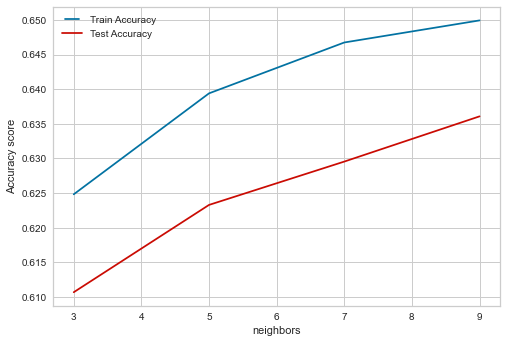

In [51]:
#Train data
knn = KNeighborsClassifier(n_jobs=-1)

parameters = dict(n_neighbors=list(range(3, 10,2)))

knn_gridsearch_train = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_train.fit(X_train, y_train)

#Test data

knn_gridsearch_test = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_test.fit(X_test, y_test)

n_neighbors=n_neighbors=list(range(3, 10,2))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_neighbors, pd.DataFrame(knn_gridsearch_train.cv_results_)["mean_test_score"], 'b', label="Train Accuracy")
line2, = plt.plot(n_neighbors, pd.DataFrame(knn_gridsearch_test.cv_results_)["mean_test_score"], 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('neighbors')
plt.show()

In [52]:
knn_grid_neighbour=pd.concat([pd.DataFrame(knn_gridsearch_train.cv_results_)[["param_n_neighbors","mean_test_score"]],
pd.DataFrame(knn_gridsearch_test.cv_results_)[["mean_test_score"]]],axis=1)
knn_grid_neighbour['diff']=knn_grid_neighbour.iloc[:,1]-knn_grid_neighbour.iloc[:,2]
knn_grid_neighbour.columns=["param_n_neighbors",'mean_train_score','mean_test_score','diff']
knn_grid_neighbour['diff']=knn_grid_neighbour["diff"].abs()

#knn_grid_neighbour=knn_grid_neighbour.sort_values(['diff','mean_test_score'],ascending=[True,False])
knn_grid_neighbour=knn_grid_neighbour.sort_values(['mean_test_score','diff'],ascending=[False,True])

n_neighbour=knn_grid_neighbour.iloc[0,0]
print("Number of neighbour is:",n_neighbour)

knn_grid_neighbour

Number of neighbour is: 9


,param_n_neighbors,mean_train_score,mean_test_score,diff
3,9,0.649928,0.636075,0.013853
2,7,0.646741,0.629545,0.017196
1,5,0.639395,0.623288,0.016107
0,3,0.624820,0.610684,0.014136


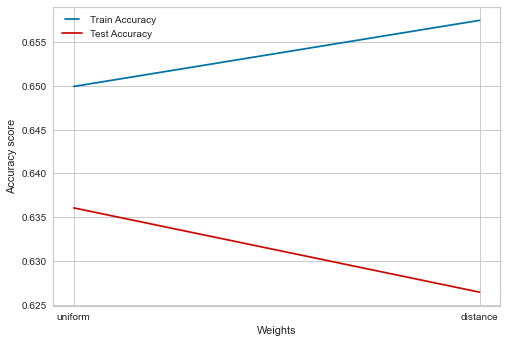

In [53]:
#Train data
knn = KNeighborsClassifier(n_neighbors=n_neighbour,n_jobs=-1)

parameters = dict(weights = ['uniform', 'distance'])

knn_gridsearch_train = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_train.fit(X_train, y_train)

#Test data

knn = KNeighborsClassifier(n_neighbors=n_neighbour,n_jobs=-1)

parameters = dict(weights = ['uniform', 'distance'])

knn_gridsearch_test = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_test.fit(X_test, y_test)

weights = ['uniform', 'distance']

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(weights, pd.DataFrame(knn_gridsearch_train.cv_results_)["mean_test_score"], 'b', label="Train Accuracy")
line2, = plt.plot(weights, pd.DataFrame(knn_gridsearch_test.cv_results_)["mean_test_score"], 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Weights')
plt.show()

In [54]:
knn_grid_weight=pd.concat([pd.DataFrame(knn_gridsearch_train.cv_results_)[["param_weights","mean_test_score"]],
pd.DataFrame(knn_gridsearch_test.cv_results_)[["mean_test_score"]]],axis=1)
knn_grid_weight['diff']=knn_grid_weight.iloc[:,1]-knn_grid_weight.iloc[:,2]
knn_grid_weight.columns=["param_weights",'mean_train_score','mean_test_score','diff']
knn_grid_weight['diff']=knn_grid_weight["diff"].abs()

#knn_grid_weight=knn_grid_neighbour.sort_values(['diff','mean_test_score'],ascending=[True,False])
knn_grid_weight=knn_grid_weight.sort_values(['mean_test_score','diff'],ascending=[False,True])

weight=knn_grid_weight.iloc[0,0]
print("Weight is:",weight)

knn_grid_weight

Weight is: uniform


,param_weights,mean_train_score,mean_test_score,diff
0,uniform,0.649928,0.636075,0.013853
1,distance,0.657468,0.626463,0.031005


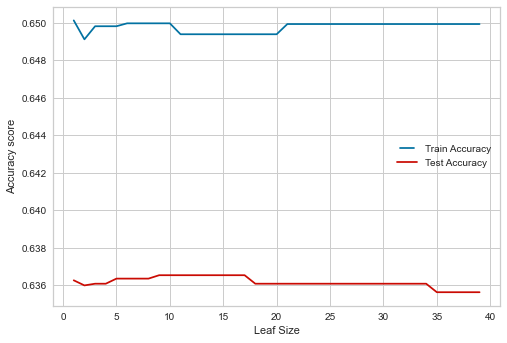

In [55]:
#Train data
knn = KNeighborsClassifier(n_neighbors=n_neighbour,weights=weight, n_jobs=-1)

parameters = dict(leaf_size=list(range(1,40,1)))

knn_gridsearch_train = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_train.fit(X_train, y_train)

#Test data

knn = KNeighborsClassifier(n_neighbors=n_neighbour,weights=weight, n_jobs=-1)

parameters = dict(leaf_size=list(range(1,40,1)))

knn_gridsearch_test = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_test.fit(X_test, y_test)

leafs = list(range(1,40,1))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(leafs, pd.DataFrame(knn_gridsearch_train.cv_results_)["mean_test_score"], 'b', label="Train Accuracy")
line2, = plt.plot(leafs, pd.DataFrame(knn_gridsearch_test.cv_results_)["mean_test_score"], 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Leaf Size')
plt.show()

In [56]:
knn_grid_leaf=pd.concat([pd.DataFrame(knn_gridsearch_train.cv_results_)[["param_leaf_size","mean_test_score"]],
pd.DataFrame(knn_gridsearch_test.cv_results_)[["mean_test_score"]]],axis=1)
knn_grid_leaf['diff']=knn_grid_leaf.iloc[:,1]-knn_grid_leaf.iloc[:,2]
knn_grid_leaf.columns=["param_leaf_size",'mean_train_score','mean_test_score','diff']
knn_grid_leaf['diff']=knn_grid_leaf["diff"].abs()

#knn_grid_weight=knn_grid_neighbour.sort_values(['diff','mean_test_score'],ascending=[True,False])
knn_grid_leaf=knn_grid_leaf.sort_values(['mean_test_score','diff'],ascending=[False,True])

leaf=knn_grid_leaf.iloc[0,0]
print("Leaf size is:",leaf)

knn_grid_leaf

Leaf size is: 11


,param_leaf_size,mean_train_score,mean_test_score,diff
10,11,0.649384,0.636529,0.012855
11,12,0.649384,0.636529,0.012855
12,13,0.649384,0.636529,0.012855
13,14,0.649384,0.636529,0.012855
14,15,0.649384,0.636529,0.012855
15,16,0.649384,0.636529,0.012855
16,17,0.649384,0.636529,0.012855
8,9,0.649967,0.636529,0.013438
9,10,0.649967,0.636529,0.013438
4,5,0.649811,0.636347,0.013464


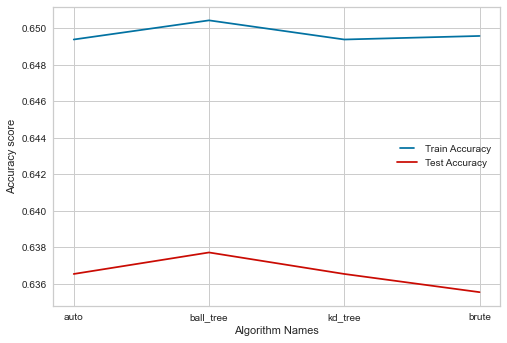

In [57]:
#Train data
knn = KNeighborsClassifier(n_neighbors=n_neighbour,weights=weight, leaf_size=leaf,n_jobs=-1)

parameters = dict(algorithm=['auto', 'ball_tree','kd_tree','brute'])

knn_gridsearch_train = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_train.fit(X_train, y_train)

#Test data

knn = KNeighborsClassifier(n_neighbors=n_neighbour,weights=weight, leaf_size=leaf,n_jobs=-1)

parameters = dict(algorithm=['auto', 'ball_tree','kd_tree','brute'])

knn_gridsearch_test = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_test.fit(X_test, y_test)

algorithm_names = ['auto', 'ball_tree','kd_tree','brute']

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(algorithm_names, pd.DataFrame(knn_gridsearch_train.cv_results_)["mean_test_score"], 'b', label="Train Accuracy")
line2, = plt.plot(algorithm_names, pd.DataFrame(knn_gridsearch_test.cv_results_)["mean_test_score"], 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Algorithm Names')
plt.show()

In [58]:
knn_grid_algorithm=pd.concat([pd.DataFrame(knn_gridsearch_train.cv_results_)[["param_algorithm","mean_test_score"]],
pd.DataFrame(knn_gridsearch_test.cv_results_)[["mean_test_score"]]],axis=1)
knn_grid_algorithm['diff']=knn_grid_algorithm.iloc[:,1]-knn_grid_algorithm.iloc[:,2]
knn_grid_algorithm.columns=["param_algorithm",'mean_train_score','mean_test_score','diff']
knn_grid_algorithm['diff']=knn_grid_algorithm["diff"].abs()

#knn_grid_algorithm=knn_grid_algorithm.sort_values(['diff','mean_test_score'],ascending=[True,False])
knn_grid_algorithm=knn_grid_algorithm.sort_values(['mean_test_score','diff'],ascending=[False,True])

algorithm=knn_grid_algorithm.iloc[0,0]
print("Algorithm is:",algorithm)

knn_grid_algorithm

Algorithm is: ball_tree


,param_algorithm,mean_train_score,mean_test_score,diff
1,ball_tree,0.650433,0.637708,0.012726
0,auto,0.649384,0.636529,0.012855
2,kd_tree,0.649384,0.636529,0.012855
3,brute,0.649578,0.635531,0.014047


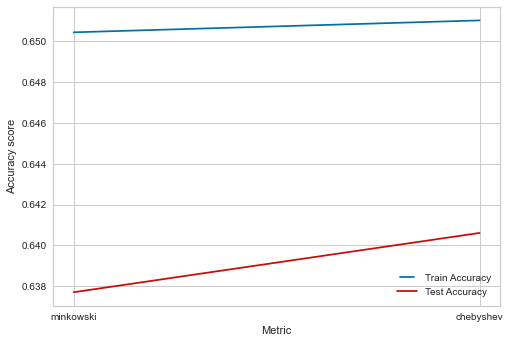

In [59]:
#Train data
knn = KNeighborsClassifier(n_neighbors=n_neighbour,weights=weight, leaf_size=leaf, algorithm=algorithm,n_jobs=-1)

parameters = dict(metric=['minkowski', 'chebyshev'])

knn_gridsearch_train = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_train.fit(X_train, y_train)

#Test data

knn = KNeighborsClassifier(n_neighbors=n_neighbour,weights=weight, leaf_size=leaf,algorithm=algorithm,n_jobs=-1)

parameters = dict(metric=['minkowski', 'chebyshev'])

knn_gridsearch_test = GridSearchCV(estimator=knn,
                           param_grid= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

knn_gridsearch_test.fit(X_test, y_test)

metric_names = ['minkowski', 'chebyshev']

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(metric_names , pd.DataFrame(knn_gridsearch_train.cv_results_)["mean_test_score"], 'b', label="Train Accuracy")
line2, = plt.plot(metric_names , pd.DataFrame(knn_gridsearch_test.cv_results_)["mean_test_score"], 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Metric')
plt.show()

In [60]:
knn_grid_metric=pd.concat([pd.DataFrame(knn_gridsearch_train.cv_results_)[["param_metric","mean_test_score"]],
pd.DataFrame(knn_gridsearch_test.cv_results_)[["mean_test_score"]]],axis=1)
knn_grid_metric['diff']=knn_grid_metric.iloc[:,1]-knn_grid_algorithm.iloc[:,2]
knn_grid_metric.columns=["param_metric",'mean_train_score','mean_test_score','diff']
knn_grid_metric['diff']=knn_grid_metric["diff"].abs()

#knn_grid_metric=knn_grid_metric.sort_values(['diff','mean_test_score'],ascending=[True,False])
knn_grid_metric=knn_grid_metric.sort_values(['mean_test_score','diff'],ascending=[False,True])

metric=knn_grid_metric.iloc[0,0]
print("Metric is:",metric)

knn_grid_metric

Metric is: chebyshev


,param_metric,mean_train_score,mean_test_score,diff
1,chebyshev,0.651016,0.640610,0.013309
0,minkowski,0.650433,0.637708,0.013904


In [61]:
knn_ht = KNeighborsClassifier(n_neighbors=n_neighbour,weights=weight, leaf_size=leaf, algorithm=algorithm, metric=metric, n_jobs=-1
)

knn_ht.fit(X_train, y_train)

pred_train = knn_ht.predict(X_train)
pred_test = knn_ht.predict(X_test)
pred_validation = knn_ht.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = knn_ht.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = knn_ht.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = knn_ht.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print('\n')
print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = knn_ht.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = knn_ht.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.74      0.68      0.71     12883
           1       0.70      0.76      0.73     12846

    accuracy                           0.72     25729
   macro avg       0.72      0.72      0.72     25729
weighted avg       0.72      0.72      0.72     25729

f1_score() value        : 0.73
recall_score() value    : 0.76
precision_score() value : 0.70


Precision  : [0.73800924 0.70363137]
Recall     : [0.68198401 0.75720069]
F1 Score   : [0.7088914  0.72943382]


Test Dataset


              precision    recall  f1-score   support

           0       0.65      0.61      0.63      5495
           1       0.63      0.68      0.66      5532

    accuracy                           0.64     11027
   macro avg       0.64      0.64      0.64     11027
weighted avg       0.64      0.64      0.64     11027

f1_score() value        : 0.66
recall_score() value    : 0.68
precision_score() value : 0.63


Precision  :

In [62]:
knn_ht_result={'Method':'K-NN (Hyperparameter Tuning)',  'Train Score': knn_ht.score(X_train,y_train),
           'Test Accuracy': knn_ht.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': knn_ht.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [63]:
result_mat=result_mat.append(knn_ht_result,ignore_index=True)

In [64]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814
5,Random Forest,0.705391,0.673529,0.790311,0.641809,0.725291,0.595128,0.809500,0.306907,0.723993
6,Naive Bayes,0.578530,0.577854,0.389190,0.627880,0.639046,0.697279,0.393242,0.303477,0.645405
7,K-NN,0.935054,0.663190,0.671186,0.662090,0.697787,0.598762,0.669931,0.286252,0.650047
8,K-NN (Hyperparameter Tuning),0.719538,0.641788,0.678055,0.633615,0.685866,0.612022,0.700294,0.299916,0.679207


## **XGBOOST**

In [65]:
xgb = XGBClassifier(n_jobs=-1,  random_state = 42)

parameters =dict(n_estimators=range(50, 1000, 50),
                 max_depth = range(1, 11, 2),
                 learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                 gamma=[0,0.1,0.2,0.3,0.4,0.5,2,10],
                 colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1.0],
                 min_child_weight=range(5,8)
                )


#rfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

xgb_randomsearch_train = RandomizedSearchCV(estimator=xgb ,
                           param_distributions= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

xgb_randomsearch_train.fit(X_train, y_train)
xgb_randomsearch_train.best_params_


{'n_estimators': 950,
 'min_child_weight': 6,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.5,
 'colsample_bytree': 0.7}

In [66]:
xgboost_rs = XGBClassifier(**xgb_randomsearch_train.best_params_,
    n_jobs=-1,random_state=42
)

xgboost_rs.fit(X_train, y_train)

pred_train = xgboost_rs.predict(X_train)
pred_test = xgboost_rs.predict(X_test)
pred_validation = xgboost_rs.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = xgboost_rs.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = xgboost_rs.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = xgboost_rs.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = xgboost_rs.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = xgboost_rs.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.75      0.59      0.66     12883
           1       0.66      0.81      0.73     12846

    accuracy                           0.70     25729
   macro avg       0.71      0.70      0.70     25729
weighted avg       0.71      0.70      0.70     25729

f1_score() value        : 0.73
recall_score() value    : 0.81
precision_score() value : 0.66


Precision  : [0.75494854 0.66368   ]
Recall     : [0.59209811 0.80725518]
F1 Score   : [0.66367947 0.72846054]


Test Dataset


              precision    recall  f1-score   support

           0       0.72      0.57      0.64      5495
           1       0.65      0.78      0.71      5532

    accuracy                           0.67     11027
   macro avg       0.68      0.67      0.67     11027
weighted avg       0.68      0.67      0.67     11027

f1_score() value        : 0.71
recall_score() value    : 0.78
precision_score() value : 0.65


Precision  :

In [67]:
xgb_result={'Method':'XGBOOST', 'Train Score': xgboost_rs.score(X_train,y_train),
           'Test Accuracy': xgboost_rs.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': xgboost_rs.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [68]:
result_mat=result_mat.append(xgb_result,ignore_index=True)

In [69]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814
5,Random Forest,0.705391,0.673529,0.790311,0.641809,0.725291,0.595128,0.809500,0.306907,0.723993
6,Naive Bayes,0.578530,0.577854,0.389190,0.627880,0.639046,0.697279,0.393242,0.303477,0.645405
7,K-NN,0.935054,0.663190,0.671186,0.662090,0.697787,0.598762,0.669931,0.286252,0.650047
8,K-NN (Hyperparameter Tuning),0.719538,0.641788,0.678055,0.633615,0.685866,0.612022,0.700294,0.299916,0.679207
9,XGBOOST,0.699522,0.674889,0.781453,0.645320,0.725575,0.598271,0.795788,0.306720,0.724060


## **Light GBM**

In [70]:
#import lightgbm as lgb

In [71]:
lgbm = lgb.LGBMClassifier(n_jobs=-1,  random_state = 42)

parameters =dict(n_estimators=range(50, 400, 50),
                 max_depth = range(1, 11, 1),
                 learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                 #gamma=[0,0.1,0.2,0.3,0.4,0.5,2,10],
                 colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1.0],
                 min_child_weight=range(5,8),
                 reg_alpha= [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
                 reg_lambda= [0, 1e-1, 1, 5, 10, 20, 50, 100],
                 num_leaves=[2**depth for depth in range(1,11,1)],
                )


#rfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

lgbm_randomsearch_train = RandomizedSearchCV(estimator=lgbm,
                           param_distributions= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

lgbm_randomsearch_train.fit(X_train, y_train)
lgbm_randomsearch_train.best_params_


{'reg_lambda': 50,
 'reg_alpha': 5,
 'num_leaves': 16,
 'n_estimators': 50,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.2,
 'colsample_bytree': 1.0}

In [72]:
lgbm_rs = XGBClassifier(**lgbm_randomsearch_train.best_params_,
    n_jobs=-1,random_state=42
)

lgbm_rs.fit(X_train, y_train)

pred_train = lgbm_rs.predict(X_train)
pred_test = lgbm_rs.predict(X_test)
pred_validation = lgbm_rs.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = lgbm_rs.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = lgbm_rs.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = lgbm_rs.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = lgbm_rs.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = lgbm_rs.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

[02:37:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Dataset


              precision    recall  f1-score   support

           0       0.76      0.61      0.68     12883
           1       0.67      0.81      0.74     12846

    accuracy                           0.71     25729
   macro avg       0.72      0.71      0.71     25729
weighted avg       0.72      0.71      0.71     25729

f1_score() value        : 0.74
recall_score() value    : 0.81
precision_score() value : 0.67


Precision  : [0.76260321 0.67396657]
Recall     : [0.60940775 0.80974622]
F1 Score   : [0.67745276 0.73564356]


Test Dataset


              precision    recall  f1-score   

In [73]:
lgbm_result={'Method':'LGBM', 'Train Score': lgbm_rs.score(X_train,y_train),
           'Test Accuracy': lgbm_rs.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': lgbm_rs.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [74]:
result_mat=result_mat.append(lgbm_result,ignore_index=True)

In [75]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814
5,Random Forest,0.705391,0.673529,0.790311,0.641809,0.725291,0.595128,0.809500,0.306907,0.723993
6,Naive Bayes,0.578530,0.577854,0.389190,0.627880,0.639046,0.697279,0.393242,0.303477,0.645405
7,K-NN,0.935054,0.663190,0.671186,0.662090,0.697787,0.598762,0.669931,0.286252,0.650047
8,K-NN (Hyperparameter Tuning),0.719538,0.641788,0.678055,0.633615,0.685866,0.612022,0.700294,0.299916,0.679207
9,XGBOOST,0.699522,0.674889,0.781453,0.645320,0.725575,0.598271,0.795788,0.306720,0.724060


## **Gradient Boosting Algorithm**

In [76]:
gbm = GradientBoostingClassifier(random_state = 42)

parameters =dict(n_estimators=range(50, 1000, 50),
                 max_depth = range(1, 11, 1),
                 learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                 min_samples_split =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
                 min_samples_leaf =range(2,50,2),
                 max_features = list(range(3,X_train.shape[1])),
                 subsample=[0.5,0.6,0.7,0.8,0.9]
                          )


#rfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

gbm_randomsearch_train = RandomizedSearchCV(estimator=gbm,
                           param_distributions= parameters,
                           cv = 5,
                           scoring = 'accuracy'
                      )

gbm_randomsearch_train.fit(X_train, y_train)
gbm_randomsearch_train.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 22,
 'max_features': 23,
 'max_depth': 8,
 'learning_rate': 0.01}

In [77]:
gbm_rs = GradientBoostingClassifier(**gbm_randomsearch_train.best_params_,
   random_state=42
)

gbm_rs.fit(X_train, y_train)

pred_train = gbm_rs.predict(X_train)
pred_test = gbm_rs.predict(X_test)
pred_validation = gbm_rs.predict(X_validation)
    
conf_mtx_train = confusion_matrix(y_train, pred_train)
conf_mtx_test = confusion_matrix(y_test, pred_test)
conf_mtx_validation = confusion_matrix(y_validation, pred_validation)
    
print("Train Dataset")
print('\n')
print(classification_report(y_train, pred_train))

train_prediction = gbm_rs.predict(X_train)

print("f1_score() value        : {:.2f}".format(f1_score(y_train, train_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_train, train_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_train, train_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_train, train_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

print('\n')
        
print("Test Dataset") 
print('\n')
print(classification_report(y_test, pred_test))
                              
test_prediction = gbm_rs.predict(X_test)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
test_prediction_proba = gbm_rs.predict_proba(X_test)[:,1]
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

print("Validation Dataset") 
print('\n')
print(classification_report(y_validation, pred_validation))
                              
validation_prediction = gbm_rs.predict(X_validation)
  
print("f1_score() value        : {:.2f}".format(f1_score(y_validation, validation_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_validation, validation_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_validation, validation_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_validation, validation_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 
    
validation_prediction_proba = gbm_rs.predict_proba(X_validation)[:,1]
print('AUC value : ', roc_auc_score(y_validation, validation_prediction_proba))

Train Dataset


              precision    recall  f1-score   support

           0       0.77      0.59      0.67     12883
           1       0.67      0.82      0.73     12846

    accuracy                           0.71     25729
   macro avg       0.72      0.71      0.70     25729
weighted avg       0.72      0.71      0.70     25729

f1_score() value        : 0.73
recall_score() value    : 0.82
precision_score() value : 0.67


Precision  : [0.76536425 0.66772675]
Recall     : [0.59450439 0.81721937]
F1 Score   : [0.66920052 0.73494819]


Test Dataset


              precision    recall  f1-score   support

           0       0.72      0.56      0.63      5495
           1       0.64      0.78      0.71      5532

    accuracy                           0.67     11027
   macro avg       0.68      0.67      0.67     11027
weighted avg       0.68      0.67      0.67     11027

f1_score() value        : 0.71
recall_score() value    : 0.78
precision_score() value : 0.64


Precision  :

In [78]:
gbm_result={'Method':'Gradient Boosting', 'Train Score': gbm_rs.score(X_train,y_train),
           'Test Accuracy': gbm_rs.score(X_test,y_test), 'Test Recall': recall_score(y_test, test_prediction) ,
           'Test Precision': precision_score(y_test, test_prediction), 'Test AUC':roc_auc_score(y_test, test_prediction_proba),
           'Validation Accuracy': gbm_rs.score(X_validation,y_validation), 'Validation Recall': recall_score(y_validation, validation_prediction) ,
           'Validation Precision': precision_score(y_validation, validation_prediction), 'Validation AUC':roc_auc_score(y_validation, validation_prediction_proba)}

In [79]:
result_mat=result_mat.append(gbm_result,ignore_index=True)

In [80]:
result_mat

,Method,Train Score,Test Accuracy,Test Recall,Test Precision,Test AUC,Validation Accuracy,Validation Recall,Validation Precision,Validation AUC
0,Logistic Regression,0.643632,0.642060,0.669740,0.636052,0.669723,0.621943,0.660137,0.299356,0.666090
1,Logistic Regression-L1,0.665475,0.663462,0.851410,0.619818,0.668982,0.546999,0.861900,0.288998,0.666075
2,Logistic Regression-L2,0.644409,0.643058,0.679501,0.634752,0.670813,0.618702,0.667973,0.298599,0.665926
3,Logistic Regression-ElasticNet,0.655952,0.651038,0.752892,0.626693,0.653752,0.587958,0.751224,0.293813,0.645976
4,Decision Tree,0.674142,0.665639,0.731562,0.647624,0.711895,0.624398,0.744368,0.315222,0.710814
5,Random Forest,0.705391,0.673529,0.790311,0.641809,0.725291,0.595128,0.809500,0.306907,0.723993
6,Naive Bayes,0.578530,0.577854,0.389190,0.627880,0.639046,0.697279,0.393242,0.303477,0.645405
7,K-NN,0.935054,0.663190,0.671186,0.662090,0.697787,0.598762,0.669931,0.286252,0.650047
8,K-NN (Hyperparameter Tuning),0.719538,0.641788,0.678055,0.633615,0.685866,0.612022,0.700294,0.299916,0.679207
9,XGBOOST,0.699522,0.674889,0.781453,0.645320,0.725575,0.598271,0.795788,0.306720,0.724060
